In [55]:
#import all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing, svm
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
%pylab inline

# To ignore some warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # comes up when not specifying solver for LogisticRegression
warnings.simplefilter(action='ignore', category=UserWarning)

Populating the interactive namespace from numpy and matplotlib


In [99]:
# data = pd.read_csv('../data/Norm_Data_Final.csv', index_col=0)
data = pd.read_csv('../data/Data_crimeMinMaxScaled.csv', index_col=0)
data.head()

,HasGarden,GardenCounts_MMscaled,Gender_Female,Age_Over65,Unemployed,Race_Hisp,Race_White,Race_Black,Race_Asian,Race_Other,Income_Low,Income_Mid,Income_High,Edu_UnderBach,Edu_Bachelor,Edu_GradProf,Crime_Felony_MMscaled,Crime_Misdemeanor_MMscaled,Crime_Violation_MMscaled,Crime_Total_MMscaled
NTA,,,,,,,,,,,,,,,,,,,,
Bath Beach,0.0,0.000000,0.496849,0.147393,0.070566,0.176733,0.436933,0.012182,0.361095,0.013057,0.433409,0.299790,0.266801,0.663798,0.224372,0.111829,0.010496,0.012187,0.016769,0.012089
Bay Ridge,0.0,0.000000,0.521963,0.156444,0.074922,0.178608,0.634329,0.019094,0.145513,0.022456,0.409413,0.289008,0.301580,0.535735,0.271976,0.192289,0.011752,0.015232,0.027670,0.015315
Bedford,1.0,0.638889,0.515508,0.077219,0.125027,0.194933,0.350607,0.405826,0.030404,0.018229,0.575924,0.229287,0.194789,0.678193,0.204352,0.117455,0.028667,0.023144,0.038305,0.026313
Bensonhurst East,1.0,0.027778,0.513234,0.157266,0.085202,0.123283,0.465153,0.008262,0.386793,0.016509,0.510524,0.290981,0.198495,0.698153,0.204564,0.097283,0.010267,0.008911,0.017379,0.010138
Bensonhurst West,1.0,0.055556,0.512788,0.142625,0.088342,0.145975,0.426773,0.008740,0.405168,0.013345,0.492862,0.285700,0.221438,0.737618,0.188800,0.073582,0.009682,0.008536,0.015215,0.009528


In [57]:
# split into train, test, and validate data
from sklearn.model_selection import train_test_split

# y = data[['GardenCounts', 'HasGarden']]
# X = data.drop(columns=['GardenCounts', 'HasGarden'])
y = data[['GardenCounts_MMscaled', 'HasGarden']]
X = data.drop(columns=['GardenCounts_MMscaled', 'HasGarden'])

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.20, random_state=42)
# not generating validation set here cos we will use cross-validation later

In [58]:
Xtrain.shape, Xtest.shape

((152, 18), (39, 18))

#### Scale the data (no longer relevant bc new dataset is already scaled)

In [59]:
# scale X data
# scaler = preprocessing.StandardScaler().fit(Xtrain)
# XtrainS = pd.DataFrame(scaler.transform(Xtrain))
# XtestS = pd.DataFrame(scaler.transform(Xtest))

In [60]:
# check for null vals
# XtrainS.isnull().values.sum(), XtestS.isnull().values.sum()
Xtrain.isnull().values.sum(), Xtest.isnull().values.sum()

(0, 0)

## 1) Logistic Regression with all features

In [95]:
# Learn logistic regression over the training sample
# logit = LogisticRegression(C=1) # i imagine that c=10000 might be too severe
# logit = logit.fit(XtrainS, Ytrain['HasGarden']) #fit logistic regression model to training data
logit = LogisticRegression(C=1) # i imagine that c=10000 might be too severe
logit = logit.fit(Xtrain, Ytrain['HasGarden']) #fit logistic regression model to training data

In [96]:
# calculate out of sample accuracy
# logit.score(XtestS, Ytest['HasGarden'])
logit.score(Xtest, Ytest['HasGarden'])

0.7435897435897436

In [97]:
# generate confusion matrix
confusion_matrix(Ytest['HasGarden'], logit.predict(Xtest))

array([[10,  4],
       [ 6, 19]])

### Hyperparam tuning of regularisation constant C

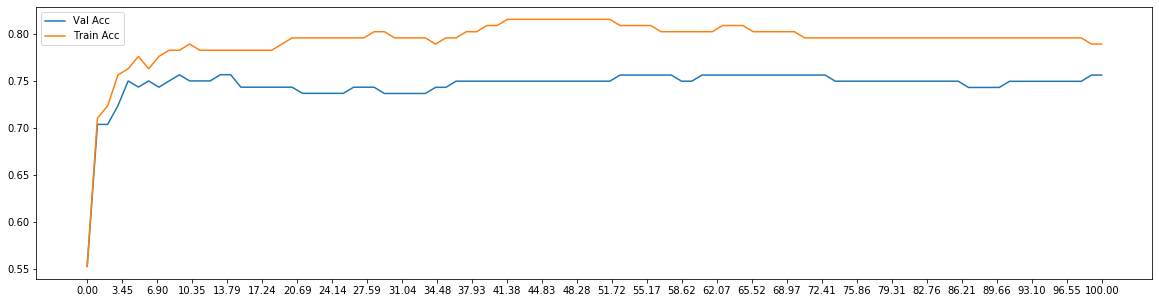

In [64]:
# try a smaller range with smaller intervals
# and use cross validation
from sklearn.model_selection import cross_val_score

train_acc = []
mean_cross_val_acc = []
C_candidates = np.linspace(start=0.001, stop=100, num=100)

for c in C_candidates:
#     logit = LogisticRegression(C=c).fit(XtrainS, Ytrain['HasGarden'])
#     train_acc.append(logit.score(XtrainS, Ytrain['HasGarden']))
#     mean_cross_val_acc.append(mean(cross_val_score(logit, XtrainS, Ytrain['HasGarden'])))
    
    logit = LogisticRegression(C=c).fit(Xtrain, Ytrain['HasGarden'])
    train_acc.append(logit.score(Xtrain, Ytrain['HasGarden']))
    mean_cross_val_acc.append(mean(cross_val_score(logit, Xtrain, Ytrain['HasGarden'])))

# plot to see where it overfits
plt.figure(figsize=(20,5))
plt.plot(C_candidates, mean_cross_val_acc, label='Val Acc')
plt.plot(C_candidates, train_acc, label='Train Acc')
plt.xticks(np.linspace(start=0.001, stop=100, num=30))
plt.legend()
plt.show()

# looks like we want the region between 0.001 to 3

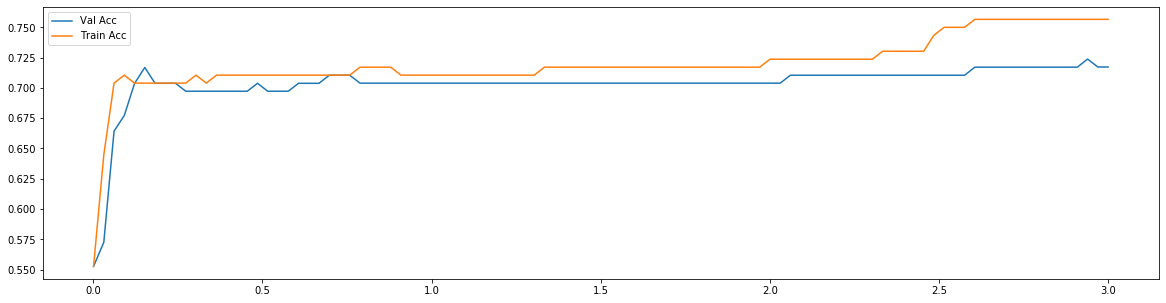

In [65]:
train_acc = []
mean_cross_val_acc = []
C_candidates = np.linspace(start=0.001, stop=3, num=100)

for c in C_candidates:
#     logit = LogisticRegression(C=c).fit(XtrainS, Ytrain['HasGarden'])
#     train_acc.append(logit.score(XtrainS, Ytrain['HasGarden']))
#     mean_cross_val_acc.append(mean(cross_val_score(logit, XtrainS, Ytrain['HasGarden'])))
    
    logit = LogisticRegression(C=c).fit(Xtrain, Ytrain['HasGarden'])
    train_acc.append(logit.score(Xtrain, Ytrain['HasGarden']))
    mean_cross_val_acc.append(mean(cross_val_score(logit, Xtrain, Ytrain['HasGarden'])))

# plot to see where it overfits
plt.figure(figsize=(20,5))
plt.plot(C_candidates, mean_cross_val_acc, label='Val Acc')
plt.plot(C_candidates, train_acc, label='Train Acc')

plt.legend()
plt.show()

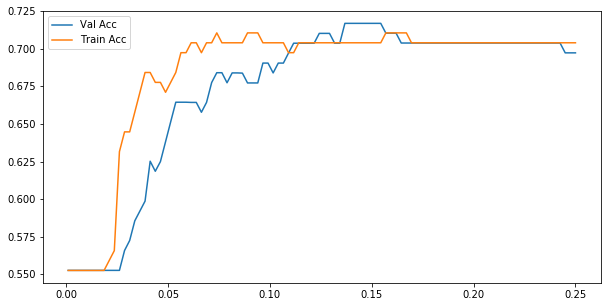

In [66]:
train_acc = []
mean_cross_val_acc = []
C_candidates = np.linspace(start=0.001, stop=0.25, num=100)

for c in C_candidates:
#     logit = LogisticRegression(C=c).fit(XtrainS, Ytrain['HasGarden'])
#     train_acc.append(logit.score(XtrainS, Ytrain['HasGarden']))
#     mean_cross_val_acc.append(mean(cross_val_score(logit, XtrainS, Ytrain['HasGarden'])))
    
    logit = LogisticRegression(C=c).fit(Xtrain, Ytrain['HasGarden'])
    train_acc.append(logit.score(Xtrain, Ytrain['HasGarden']))
    mean_cross_val_acc.append(mean(cross_val_score(logit, Xtrain, Ytrain['HasGarden'])))


# plot to see where it overfits
plt.figure(figsize=(10,5))
plt.plot(C_candidates, mean_cross_val_acc, label='Val Acc')
plt.plot(C_candidates, train_acc, label='Train Acc')

plt.legend()
plt.show()

In [67]:
# best C value
optimal_C = C_candidates[np.argmax(mean_cross_val_acc)]
optimal_C

0.1368181818181818

### Logistic regression with optimal C (with all features)

In [98]:
# logit = LogisticRegression(C=optimal_C).fit(XtrainS, Ytrain['HasGarden'])
logit = LogisticRegression(C=optimal_C).fit(Xtrain, Ytrain['HasGarden'])
# out of sample
# logit.score(XtestS, Ytest['HasGarden'])
logit.score(Xtest, Ytest['HasGarden'])

0.6666666666666666

## 2) Logistic Model with Sparse PCA

In [178]:
from sklearn.decomposition import SparsePCA

In [179]:
ACS_data_for_spca = pd.read_csv('../data/Norm_Data_Final.csv', index_col=0)
ACS_data_for_spca.head()

,FemEN,PopOv65N,HispN,WhiteN,BlackN,AsianN,RaceOther,HHINC_U10N,HHINC_10t14N,HHINC_15t24N,HHINC_25t34N,HHINC_35t49N,HHINC_50t74N,HHINC_75t99N,HHINC_100t149N,HHINC_150t199N,HHINC_200plN,CLF_UnemployedN,EduOtherN,EduBachelor,EduGradProf,FELONY_norm,MISDEMEANOR_norm,VIOLATION_norm,TOTAL_CRIME_norm,GardenCounts,HasGarden
NTA,,,,,,,,,,,,,,,,,,,,,,,,,,,
Bath Beach,0.496849,0.147393,0.176733,0.436933,0.012182,0.361095,0.013057,0.078316,0.054078,0.107018,0.081117,0.112881,0.181484,0.118306,0.153833,0.061778,0.051190,0.070566,0.663798,0.224372,0.111829,0.030033,0.065645,0.014444,0.110123,0.0,0.0
Bay Ridge,0.521963,0.156444,0.178608,0.634329,0.019094,0.145513,0.022456,0.069072,0.046973,0.096605,0.090991,0.105772,0.166333,0.122674,0.144145,0.074566,0.082868,0.074922,0.535735,0.271976,0.192289,0.033627,0.082051,0.023833,0.139510,0.0,0.0
Bedford,0.515508,0.077219,0.194933,0.350607,0.405826,0.030404,0.018229,0.140949,0.088914,0.129898,0.096282,0.119882,0.142216,0.087072,0.109252,0.045857,0.039679,0.125027,0.678193,0.204352,0.117455,0.082026,0.124671,0.032993,0.239690,23.0,1.0
Bensonhurst East,0.513234,0.157266,0.123283,0.465153,0.008262,0.386793,0.016509,0.106188,0.063686,0.122504,0.098481,0.119665,0.175688,0.115293,0.108893,0.051562,0.038040,0.085202,0.698153,0.204564,0.097283,0.029377,0.048003,0.014969,0.092349,1.0,1.0
Bensonhurst West,0.512788,0.142625,0.145975,0.426773,0.008740,0.405168,0.013345,0.077903,0.058377,0.113110,0.108529,0.134943,0.171086,0.114614,0.125146,0.055134,0.041158,0.088342,0.737618,0.188800,0.073582,0.027704,0.045981,0.013105,0.086790,2.0,1.0


In [180]:
ACS_data_for_spca = ACS_data_for_spca.drop(columns=['FELONY_norm', 'MISDEMEANOR_norm', 'VIOLATION_norm', 'TOTAL_CRIME_norm'])

In [181]:
crime_for_spca = data[['Crime_Felony_MMscaled', 'Crime_Misdemeanor_MMscaled','Crime_Violation_MMscaled', 'Crime_Total_MMscaled']]
crime_for_spca.head()

,Crime_Felony_MMscaled,Crime_Misdemeanor_MMscaled,Crime_Violation_MMscaled,Crime_Total_MMscaled
NTA,,,,
Bath Beach,0.010496,0.012187,0.016769,0.012089
Bay Ridge,0.011752,0.015232,0.027670,0.015315
Bedford,0.028667,0.023144,0.038305,0.026313
Bensonhurst East,0.010267,0.008911,0.017379,0.010138
Bensonhurst West,0.009682,0.008536,0.015215,0.009528


In [182]:
data_spca = ACS_data_for_spca.merge(crime_for_spca, how= 'left', left_index = True, right_index=True)
data_spca.head()

,FemEN,PopOv65N,HispN,WhiteN,BlackN,AsianN,RaceOther,HHINC_U10N,HHINC_10t14N,HHINC_15t24N,HHINC_25t34N,HHINC_35t49N,HHINC_50t74N,HHINC_75t99N,HHINC_100t149N,HHINC_150t199N,HHINC_200plN,CLF_UnemployedN,EduOtherN,EduBachelor,EduGradProf,GardenCounts,HasGarden,Crime_Felony_MMscaled,Crime_Misdemeanor_MMscaled,Crime_Violation_MMscaled,Crime_Total_MMscaled
NTA,,,,,,,,,,,,,,,,,,,,,,,,,,,
Bath Beach,0.496849,0.147393,0.176733,0.436933,0.012182,0.361095,0.013057,0.078316,0.054078,0.107018,0.081117,0.112881,0.181484,0.118306,0.153833,0.061778,0.051190,0.070566,0.663798,0.224372,0.111829,0.0,0.0,0.010496,0.012187,0.016769,0.012089
Bay Ridge,0.521963,0.156444,0.178608,0.634329,0.019094,0.145513,0.022456,0.069072,0.046973,0.096605,0.090991,0.105772,0.166333,0.122674,0.144145,0.074566,0.082868,0.074922,0.535735,0.271976,0.192289,0.0,0.0,0.011752,0.015232,0.027670,0.015315
Bedford,0.515508,0.077219,0.194933,0.350607,0.405826,0.030404,0.018229,0.140949,0.088914,0.129898,0.096282,0.119882,0.142216,0.087072,0.109252,0.045857,0.039679,0.125027,0.678193,0.204352,0.117455,23.0,1.0,0.028667,0.023144,0.038305,0.026313
Bensonhurst East,0.513234,0.157266,0.123283,0.465153,0.008262,0.386793,0.016509,0.106188,0.063686,0.122504,0.098481,0.119665,0.175688,0.115293,0.108893,0.051562,0.038040,0.085202,0.698153,0.204564,0.097283,1.0,1.0,0.010267,0.008911,0.017379,0.010138
Bensonhurst West,0.512788,0.142625,0.145975,0.426773,0.008740,0.405168,0.013345,0.077903,0.058377,0.113110,0.108529,0.134943,0.171086,0.114614,0.125146,0.055134,0.041158,0.088342,0.737618,0.188800,0.073582,2.0,1.0,0.009682,0.008536,0.015215,0.009528


In [183]:
y_spca = data_spca[['HasGarden']]
X_spca = data_spca.drop(columns=['GardenCounts', 'HasGarden'])

Xtrain_spca, Xtest_spca, Ytrain_spca, Ytest_spca = train_test_split(X, y, test_size=0.20, random_state=42)

In [167]:
# apply sparse PCA
spca = SparsePCA(n_components=Xtrain_spca.shape[1]).fit(Xtrain_spca)
XtrainP = spca.transform(Xtrain_spca)
XtestP = spca.transform(Xtest_spca)


/Users/cmvandev/opt/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/sparse_pca.py:170: DeprecationWarning: normalize_components=False is a backward-compatible setting that implements a non-standard definition of sparse PCA. This compatibility mode will be removed in 0.22.
  DeprecationWarning)


In [168]:
print(XtrainP.shape)
print(XtestP.shape)

(152, 18)
(39, 18)


In [169]:
# see which features sparsePCA deemed helpful
pd.set_option('display.max_columns', None)
print(pd.DataFrame(XtrainP, index=Xtrain_spca.index, columns=Xtrain_spca.columns).describe())

# seems like sparsePCA didn't use Income, Edu, Crime (perhaps there was correlation w/other features?)

       Gender_Female  Age_Over65  Unemployed   Race_Hisp  Race_White  \
count     152.000000  152.000000  152.000000  152.000000  152.000000   
mean       -0.073639   -0.063387   -0.051701    0.024156    0.055432   
std         0.034117    0.050773    0.062704    0.077686    0.059409   
min        -0.163952   -0.169466   -0.216271    0.000000    0.001312   
25%        -0.091077   -0.113513   -0.070739    0.008764    0.013396   
50%        -0.069055   -0.054395   -0.018747    0.012747    0.032376   
75%        -0.051061   -0.014860   -0.006368    0.018685    0.074489   
max        -0.013436   -0.000701   -0.000201    0.723197    0.275663   

       Race_Black  Race_Asian  Race_Other  Income_Low  Income_Mid  \
count  152.000000  152.000000       152.0       152.0       152.0   
mean     0.064710   -0.077763         0.0         0.0         0.0   
std      0.049065    0.023137         0.0         0.0         0.0   
min      0.009347   -0.116277         0.0         0.0         0.0   
25%   

### With all principle components

In [184]:
# with default C=1
logit_spca = LogisticRegression().fit(XtrainP, Ytrain_spca['HasGarden'])
logit_spca.score(XtestP, Ytest['HasGarden'])

0.48717948717948717

In [185]:
# generate confusion matrix
confusion_matrix(Ytest_spca['HasGarden'], logit_spca.predict(XtestP))

array([[10,  4],
       [16,  9]])

### Hyperparam tuning 1: Select optimal number of principle components for classification

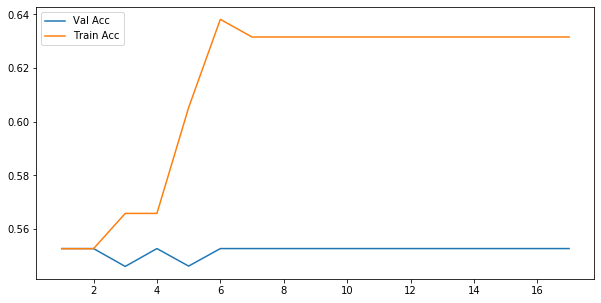

In [186]:
# select optimal number of principle components for the classification in terms of the out-of-sample accuracy measured over the validation sample
train_acc = []
mean_cross_val_acc = []
n_candidates = range(1, XtrainP.shape[1])

for n in n_candidates:
    # Learn logistic regression over the training sample
    logit_spca_opt = LogisticRegression()
    logit_spca_opt = logit_spca_opt.fit(XtrainP[:, :n], Ytrain_spca['HasGarden']) #fit logistic regression model to training data
    train_acc.append(logit_spca_opt.score(XtrainP[:, :n], Ytrain_spca['HasGarden']))
    
    # compute out of sample accuracy over validation set
    mean_cross_val_acc.append(mean(cross_val_score(logit_spca_opt, XtrainP[:, :n], Ytrain_spca['HasGarden'])))


# plot to see where it overfits
plt.figure(figsize=(10,5))
plt.plot(n_candidates, mean_cross_val_acc, label='Val Acc')
plt.plot(n_candidates, train_acc, label='Train Acc')

plt.legend()
plt.show()

In [187]:
# best num of components
optimal_n = n_candidates[np.argmax(mean_cross_val_acc)]
optimal_n

1

In [188]:
# for n in range(1, X_train_spca.shape[1]):
logit_spca_opt = LogisticRegression().fit(XtrainP[:, :optimal_n], Ytrain_spca['HasGarden'])
logit_spca_opt.score(XtestP[:, :optimal_n], Ytest_spca['HasGarden'])

0.358974358974359

### Hyperparam tuning 2: Select regularisation param

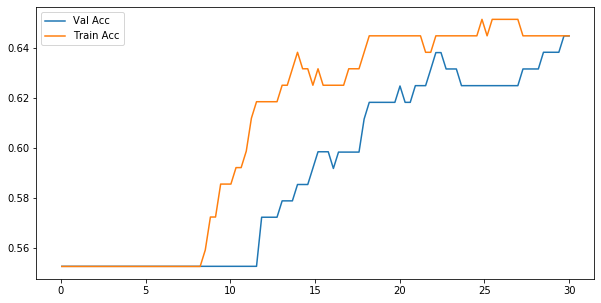

In [189]:
# hyperparam tuning for optimal C
train_acc = []
mean_cross_val_acc = []
C_candidates = np.linspace(start=0.05, stop=30, num=100) # keep toggling these numbers

for c in C_candidates:
    logit = LogisticRegression(C=c).fit(XtrainP[:, :optimal_n], Ytrain_spca['HasGarden'])
    train_acc.append(logit.score(XtrainP[:, :optimal_n], Ytrain_spca['HasGarden']))
    mean_cross_val_acc.append(mean(cross_val_score(logit, XtrainP[:, :optimal_n], Ytrain_spca['HasGarden'])))

# plot to see where it overfits
plt.figure(figsize=(10,5))
plt.plot(C_candidates, mean_cross_val_acc, label='Val Acc')
plt.plot(C_candidates, train_acc, label='Train Acc')

plt.legend()
plt.show()

In [190]:
# best C value
optimal_C = C_candidates[np.argmax(mean_cross_val_acc)]
optimal_C

29.69747474747475

In [191]:
logit = LogisticRegression(C=optimal_C).fit(XtrainP[:, :optimal_n], Ytrain_spca['HasGarden'])
logit.score(XtestP[:, :optimal_n], Ytest_spca['HasGarden'])

# hmm...same as before tuning C

0.41025641025641024

### Logistic Model with  Lasso Regularization

In [134]:
logit_lasso = LogisticRegression(penalty='l1') # lasso regression is penalty = l1; default is l2 which is ridge 
# logit_lasso = logit_lasso.fit(XtrainS, Ytrain['HasGarden']) #fit logistic regression model to training data
# logit_lasso.score(XtestS, Ytest['HasGarden'])
logit_lasso = logit_lasso.fit(Xtrain, Ytrain['HasGarden']) #fit logistic regression model to training data
logit_lasso.score(Xtest, Ytest['HasGarden'])

0.7692307692307693

In [136]:
# generate confusion matrix
confusion_matrix(Ytest['HasGarden'], logit_lasso.predict(Xtest))

array([[10,  4],
       [ 5, 20]])

In [140]:
# view the coefficients
logit_lasso.coef_

# seems like lasso regularization kept Age_Over65, Race_Hisp, Race_White, Race_Black, Race_Asion, Income_Low, Edu_UnderBach

array([[ 0.        , -0.03533059,  0.        ,  0.12121743, -1.30922816,
         0.9952242 , -0.86229675,  0.        ,  4.05290421,  0.        ,
         0.        , -2.64297902,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ]])